# Projectile Motion with Linear Air Resistance: Euler's Method

## 1. Physical Scenario
We are simulating the trajectory of a particle launched from the origin $(0,0)$ with:
* **Initial Velocity ($v_0$):** $100$ m/s
* **Launch Angles ($\theta$):** Three chosen values (e.g., $30^\circ, 45^\circ, 60^\circ$)
* **Gravity ($g$):** $10$ m/s $^2$
* **Linear Drag Coefficient ($k = B/m$):** We will use a value that makes the drag visible (e.g., $0.1$ s $^{-1}$) to observe the effect clearly.

### **The Objective**
To compare "Ideal" (vacuum) trajectories with "Linear Drag" trajectories. Linear drag (Stokes' drag) is often used for objects moving through viscous fluids or at lower speeds.

## 2. Mathematical Equations (Linear Model)

### Without Air Resistance ($B = 0$)
The acceleration is constant:
$$a_x = 0, \quad a_y = -g$$

### With Linear Air Resistance
The drag force is $\vec{F}_d = -B\vec{v}$. Dividing by mass ($m$), we get the acceleration components:
$$\frac{dv_x}{dt} = -k v_x$$
$$\frac{dv_y}{dt} = -g - k v_y$$
where $k = B/m$ is the drag per unit mass.

### Euler's Method Update
Using a small time step $\Delta t$:
1. $v_{x, i+1} = v_{x, i} + (-k v_{x, i}) \cdot \Delta t$
2. $v_{y, i+1} = v_{y, i} + (-g - k v_{y, i}) \cdot \Delta t$
3. $x_{i+1} = x_i + v_{x, i} \cdot \Delta t$
4. $y_{i+1} = y_i + v_{y, i} \cdot \Delta t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_projection(v0 , theta_degree , k, dt = 0.01):

    theta_radian = np.radians(theta_degree)
    vx = v0*np.cos(theta_radian)
    vy = v0*np.sin(theta_radian)

    x,y = [0.0],[0.0]
    g = 10.0

    while y[-1] >= 0 :  # as long as particle is above ground
        ax = -k*vx
        ay = -g - k*vy

        vx += ax*dt
        vy += ay*dt

        x.append(x[-1] + vx*dt)
        y.append(y[-1] + vy*dt)

        # Safety break for infinite loops
        if len(x) > 10000: break

    return np.array(x) , np.array(y)    

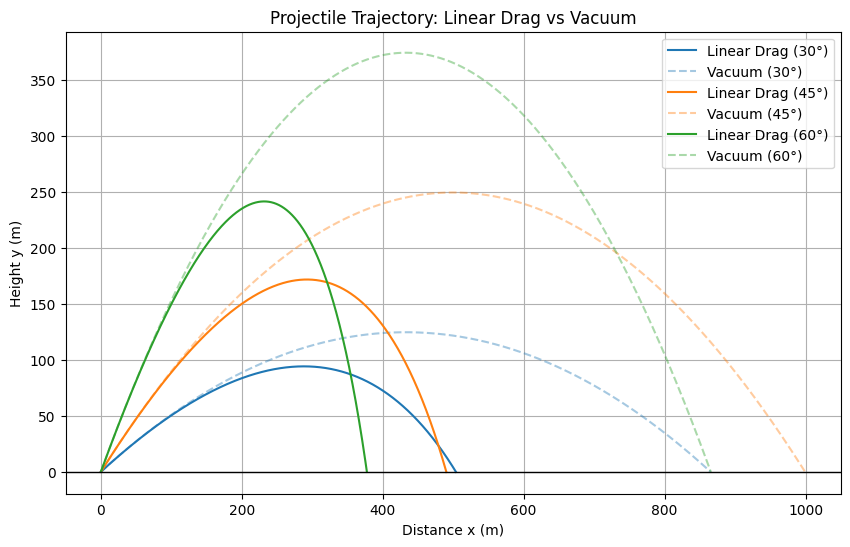

In [3]:
angles = [30,45,60]
k_val = 0.1  # Linear drag co-eff

plt.figure(figsize=(10, 6))

for angle in angles:
    # Linear Drag Trajectory
    x_lin, y_lin = simulate_projection(100, angle, k_val)
    line, = plt.plot(x_lin, y_lin, label=f'Linear Drag ({angle}°)')
    
    # Vacuum Trajectory (k = 0)
    x_vac, y_vac = simulate_projection(100, angle, 0)
    plt.plot(x_vac, y_vac, '--', color=line.get_color(), alpha=0.4, label=f'Vacuum ({angle}°)')

plt.axhline(0, color='black', lw=1)
plt.title("Projectile Trajectory: Linear Drag vs Vacuum")
plt.xlabel("Distance x (m)")
plt.ylabel("Height y (m)")
plt.legend()
plt.grid(True)
plt.show()

## 3. Observations: Projectile Motion

By comparing the trajectories of the three launch angles ($30^\circ$, $45^\circ$, and $60^\circ$) in both a vacuum and with linear drag, we observe:

* **Symmetry vs. Asymmetry:**
    * **Vacuum (Dashed Lines):** These are perfect parabolas. The projectile takes the same amount of time to rise as it does to fall, and the curve is perfectly symmetric around the peak.
    * **Linear Drag (Solid Lines):** The curves are **asymmetric**. The projectile falls much more steeply than it rose because air resistance has drained its horizontal momentum.
* **Reduction in Range and Height:** For every angle, the presence of drag significantly "shrinks" the trajectory. The horizontal distance (range) is cut nearly in half for the $45^\circ$ and $60^\circ$ launches.   

## 4. Conclusion

The simulation successfully demonstrates how air resistance fundamentally alters the "ideal" parabolic motion taught in introductory physics.

1.  **Velocity Decay:** In a vacuum, $v_x$ is constant. With linear drag, $v_x$ decays exponentially ($v_x = v_{x0}e^{-kt}$), which is why the projectile seems to "drop" out of the sky rather than continuing forward.
2.  **Energy Loss:** Air resistance is a non-conservative force that constantly removes kinetic energy from the system. This results in the reduced peaks and shorter ranges seen in the solid lines.
3.  **Euler's Method Reliability:** The numerical approach effectively handled the coupled differential equations for $x$ and $y$, producing smooth curves that match the expected physical behavior of "Stokes' Drag."

## Using Generalised Euler function

In [6]:
from generalised_euler import gen_euler

def projectile_derivatives(state, k, g):
    x, y, vx, vy = state
    return [vx, vy, -k*vx, -g - k*vy]

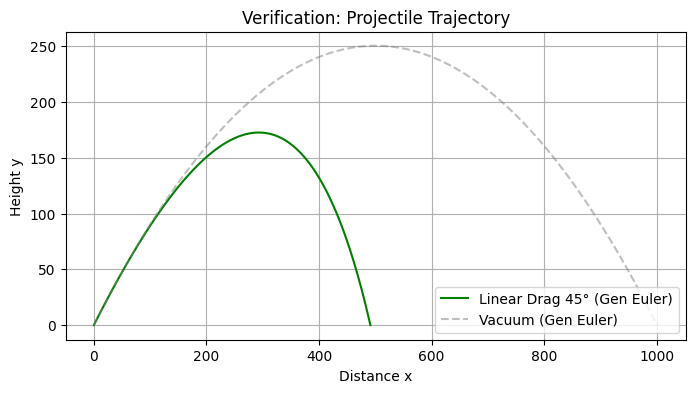

In [7]:
v0, angle_deg = 100, 45
k_val, g_val = 0.1, 10.0
dt = 0.01
theta = np.radians(angle_deg)

# Initial state: [x, y, vx, vy]
state = [0.0, 0.0, v0 * np.cos(theta), v0 * np.sin(theta)]
x_hist, y_hist = [state[0]], [state[1]]

while state[1] >= 0:
    state = gen_euler(state, dt, projectile_derivatives, k=k_val, g=g_val)
    x_hist.append(state[0])
    y_hist.append(state[1])

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x_hist, y_hist, label=f'Linear Drag {angle_deg}° (Gen Euler)', color='green')

# Quick Vacuum Comparison (k=0)
state_vac = [0.0, 0.0, v0 * np.cos(theta), v0 * np.sin(theta)]
xv, yv = [0.0], [0.0]
while state_vac[1] >= 0:
    state_vac = gen_euler(state_vac, dt, projectile_derivatives, k=0, g=g_val)
    xv.append(state_vac[0]); yv.append(state_vac[1])

plt.plot(xv, yv, '--', label='Vacuum (Gen Euler)', color='gray', alpha=0.5)
plt.title("Verification: Projectile Trajectory")
plt.xlabel("Distance x")
plt.ylabel("Height y")
plt.legend()
plt.grid(True)
plt.show()